# aixtra Experimentation Notebook

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tabulate import tabulate
import imutils
import csv
from sklearn.cluster import AgglomerativeClustering
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

## Load and show images

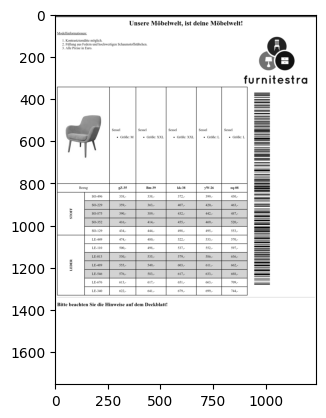

In [44]:
def show_image(opencv_img):
  rgb_im = cv2.cvtColor(opencv_img, cv2.COLOR_BGR2RGB)
  plt.imshow(rgb_im)
  plt.show()

image = cv2.imread("./images/easy.png",0)
result = image.copy()
show_image(image)

## Image processing

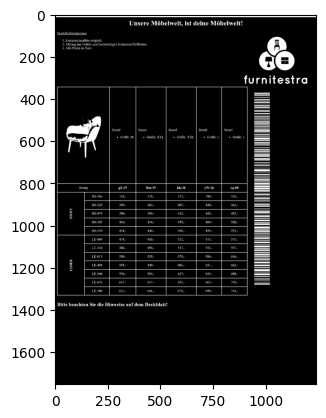

In [45]:
# Make image grayscale
convert_bin,grey_scale = cv2.threshold(image,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
grey_scale = 255-grey_scale

plt.imshow(grey_scale,cmap='gray')
plt.show()

12


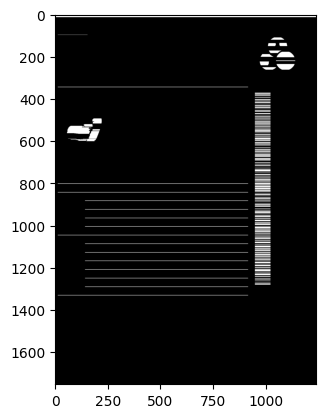

In [46]:
# Detect horizontal

length = np.array(image).shape[1]//100
print(length)

horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (length, 1))
horizontal_detect = cv2.erode(grey_scale, horizontal_kernel, iterations=3)
hor_lines = cv2.dilate(horizontal_detect, horizontal_kernel, iterations=3)
plotting = plt.imshow(hor_lines,cmap='gray')
plt.show()

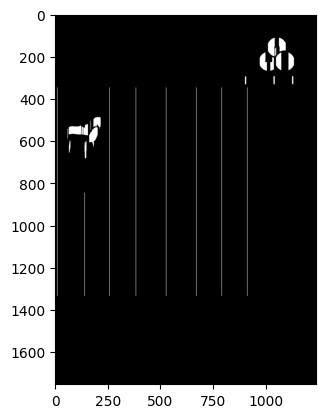

In [47]:
# Detect vertical

vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, length))
vertical_detect = cv2.erode(grey_scale, vertical_kernel, iterations=3)
ver_lines = cv2.dilate(vertical_detect, vertical_kernel, iterations=3)
plt.imshow(ver_lines,cmap='gray')
plt.show()

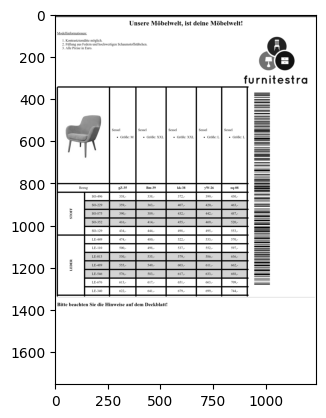

In [48]:
def find_long_horizontal_lines(hor_lines):
  # Find long horizontal lines that. They belong to our table.
  height, width = hor_lines.shape

  # Each entry is [row_start, row_end, col_start, col_end]
  hor_table_lines = []

  # We look for one long (min. half image width) line per row.
  for row in range(height):
    line_start = None

    for column in range(width):
      if hor_lines[row,column]:
        if line_start is None:
          line_start = column    
      else:
        if line_start and (column - line_start) > width / 5:
          hor_table_lines.append([row, row, line_start, column])

        line_start = None

  # Merge adjacent lines
  i = 0
  while i < len(hor_table_lines) - 1:
    curr = hor_table_lines[i]
    next = hor_table_lines[i + 1]

    if curr[0] + 1 == next[0] and curr[2:] == next[2:]:
      curr[1] += 1
      hor_table_lines.remove(next)

    i += 1

  return hor_table_lines


hor_table_lines = find_long_horizontal_lines(hor_lines)
ver_table_lines = [[*line[2:], *line[:2]] for line in find_long_horizontal_lines(ver_lines.T)]

# Output the found lines
temp_img = image.copy()
for line in [*hor_table_lines, *ver_table_lines]:
  cv2.rectangle(temp_img, (line[2], line[0]), (line[3], line[1]), (0, 255, 0), 3)
show_image(temp_img)

In [57]:
print(hor_table_lines)

[[345, 346, 13, 914], [803, 804, 13, 914], [844, 845, 13, 914], [884, 885, 142, 914], [925, 926, 142, 914], [966, 967, 142, 914], [1006, 1007, 142, 914], [1047, 1048, 13, 914], [1088, 1089, 142, 914], [1129, 1130, 142, 914], [1169, 1170, 142, 914], [1210, 1211, 142, 914], [1251, 1252, 142, 914], [1292, 1293, 142, 914], [1332, 1333, 13, 914]]


In [49]:
# for cnt in contours:
#     x, y, w, h = cv2.boundingRect(cnt)
#     # bounding the images
#     if y < 50:
#         temp_img = cv2.rectangle(temp_img, (x, y), (x + w, y + h), (0, 0, 255), 1)

In [50]:
# contours, hierarchy = cv2.findContours(
#     dilated_value, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [51]:
# kernel = np.ones((5,5),np.uint8)
# dilated_value = cv2.dilate(grey_scale,kernel,iterations = 1)

In [52]:
# show_image(dilated_value)